# Perspectives on Computational Modeling - PS 1 (Continued) 
## By: Sanittawan Tan

## Selecting and Fitting a Model ##

This document provides answers to Question 2 (Bias-variance decomposition) and Question 3 (Classification problem) of the problem set.

### Q2) Bias-variance decomposition ###

a) Generate a graph of typical (squared) bias, variance, training error, test error, and Bayes (irreducible) error curves, on a single plot

The curves generated below are based on the data from figure 2.9 in ISL (p. 31, 36). The squared bias, variance, training error, test error, and Bayes error presented here are just one possibility. The estimated mathematical functions are not precise, but the aim is to capture the rough direction and shape of each curve based on figure 2.9.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib  import cm

In [2]:
x = np.arange(0, 100)

In [3]:
scale = 48
test = lambda x: scale * (1.8 * x / scale - 1.75)**4 + 5 * scale - 0.75 * x
test_plot = test(x)

train = lambda x: scale * -3 * (x / scale - 1)**3 + 4.5 * scale - 1 * x
train_plot = train(x)

squared_bias = lambda x: scale * 7 / np.exp(3 * x / scale)
sb_plot = squared_bias(x)

variance = lambda x: scale * (np.exp(x / 0.8 / scale - 1.5))**2 + 1 * scale
var_plot = variance(x)

bayes_error = lambda x: scale * 3.6 * np.ones(x.size)
bayes_plot = bayes_error(x)

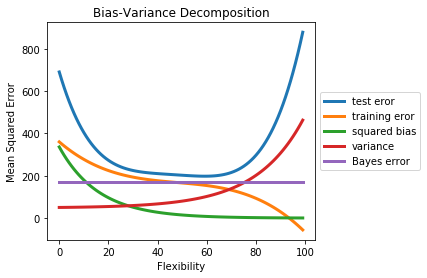

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(x, test_plot, label='test eror')
plt.plot(x, train_plot, label='training eror')
plt.plot(x, sb_plot, label='squared bias')
plt.plot(x, var_plot, label='variance')
plt.plot(x, bayes_plot, label='Bayes error')

plt.setp(ax.lines, linewidth=3)

ax.set_xlabel('Flexibility')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Bias-Variance Decomposition')

# moving legend outside - from https://stackoverflow.com/questions/
# 4700614/how-to-put-the-legend-out-of-the-plot
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('bias_variance.png')

plt.show()

The simulated data in figure 2.9 demonstrates a non-linear relationship. Therefore, we would expect that a more flexible model would perform better than an inflexible one. This appears to be true when we examine each curve.

+ The Bayes irreducible error curve (purple line) is constant because it is an error that cannot be reduced away by choice of models and estimators. 
    
    
+ As for the bias and variance curves, the general rule is that the variance will increase and the bias will decrease as the flexibility of the method increases. The green line which represents squared bias shows that it decreases as a model becomes more flexible. In contrast, the variance curve (red line) decreases for more flexible models. However, it is noted that at first the squared bias decreases at a faster rate than the variance increases. This impacts the direction of change of the test error. As a result, at first the test error will decrease, but it will start to increase when variance catches up.
   
   
+ As the test error is the sum of the variance, squared bias, and Bayes errors, we can see from this example that the test error declines when we first move from less flexible models to more flexible models. It, then, reaches a point where variance starts to increase at a faster rate and eventually increases quickly causing the test error to rise. Therefore, we see that the test error has a U-shaped curve as we go from less flexible models to more flexible models.
    
    
+ Based on the data simulated for figure 2.9, the true function is non-linear. As a result, we would expect a more flexible model to fit the data and perform better on the training set. The curve demonstrates this expectation because we see that the training error curve (yellow) monotonically declines as we move from inflexible models to more flexible models which fit the data more closely. 

### Q3) Classification problem ###

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib  import cm

In [6]:
# simulate data
np.random.seed(11)
x1 = np.random.uniform(low=-1.0, high=1.0, size=200)

In [7]:
# simulate data
np.random.seed(12)
x2 = np.random.uniform(low=-1.0, high=1.0, size=200)

In [8]:
# define a classifier
def classifier(x1, x2):
    np.random.seed(13)
    mu = 0
    sigma = 0.25**0.5
    epsilon = np.random.normal(mu, sigma, len(x1))
    y = x1 + x1**2 + x2 + x2**2 + epsilon
    y = np.exp(y) / (1 + np.exp(y))
    y = np.where(y > 0.5, 1 , 0)
    
    return y

In [9]:
# classify data points
y = classifier(x1, x2)

In [10]:
# The code below refers to this tutorial: https://stackoverflow.com/questions/41138706
# /recreating-decision-boundary-plot-in-python-with-scikit-learn-and-matplotlib
# create a mesh grid
h = 0.2
x_min, x_max = x1.min() - 1, x1.max() + 1
y_min, y_max = x2.min() - 1, x2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [11]:
# define a classifer for the mesh grid
z = classifier(xx.ravel(), yy.ravel())
z = z.reshape(xx.shape)

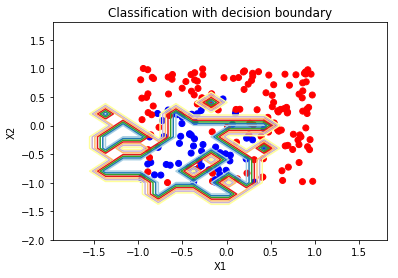

In [14]:
# plot both data points and decision boundary based on the defined classifier
# red dots are successes and blue dots are failures
plt.scatter(x1, x2, c=y, alpha=1, cmap='bwr')
plt.contour(xx, yy, z, cmap=plt.cm.Paired)
plt.title('Classification with decision boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()